Introduction to Python
================================

Lesson 2 - Part 2
--------

## Summary

In this Lesson we will start using Python in order to create some models.

The models that we will create are:
  - Linear

In order to do so we must intruduce some important libraries:

  - Pandas
  - Sklearn
  - Numpy

In [1]:
%load_ext rpy2.ipython

In [2]:
from IPython.display import display, HTML

## Linear Model

Now we will create a linear model using the data of the `diabetes`  dataset of `SKLearn`.

The description of the dataset, taken from the [Doc. Page](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), says:

*Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.*

We will use the **body max index** to predict the **target variabile**, i.e. the measure of disease progression one year after baseline.

The same analysis is done 3 times on order to show you how to handle it by using:

  - `Numpy`
  - `Pandas`
  - `R`

## Numpy  solution

Let's see how to solve the problem using `Numpy`.

**NOTE**: the graph at the end of the analysis is done using the library `matplotlib.pyplot`

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
display(diabetes)
print('The type of diabetes.data:',type(diabetes.data),diabetes.data.shape)
print('The type of diabetes.target:',type(diabetes.target),diabetes.target.shape)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

The type of diabetes.data: <class 'numpy.ndarray'> (442, 10)
The type of diabetes.target: <class 'numpy.ndarray'> (442,)


In [4]:
# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data[:,2].reshape(-1,1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print('Dimension of diabetes_X_train:',diabetes_X_train.shape)
print('Dimension of diabetes_X_test:',diabetes_X_test.shape)

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print('Dimension of diabetes_y_train:',diabetes_y_train.shape)
print('Dimension of diabetes_y_test:',diabetes_y_test.shape)

Dimension of diabetes_X_train: (422, 1)
Dimension of diabetes_X_test: (20, 1)
Dimension of diabetes_y_train: (422,)
Dimension of diabetes_y_test: (20,)


**NOTE**: as you can see the shape of train and test are different. This is necessary because the linear regression needs an `x` variables to be a **2D array**

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125] 152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


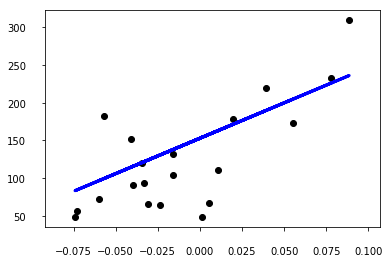

In [6]:
# Plot outputs

#Scatter and line
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#Axis 
plt.tick_params(axis='both', which='major', labelsize=10, pad=15)
plt.tick_params(axis='y', which='minor', labelsize=10, pad=15)

#Print graph
plt.show()


## Pandas  solution

Let's see how to solve the problem using `Pandas`.

Again the graph at the end of the analysis is done using the library `matplotlib.pyplot`.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

testDim = 20
nrows = diabetes.data.shape[0]
index = ['patient_%i'%i for i in range(0,nrows)]
df = pd.DataFrame(diabetes.data,
                  columns=['Age','Sex','Body_mass_index','Average_blood_pressure','S1','S2','S3','S4','S5','S6'],
                  index=index)
# d_X = df.iloc[:,2]
d_X = df[['Body_mass_index']]
d_Y = pd.DataFrame(diabetes.target)
d_X_train = d_X.iloc[:-testDim]
d_X_test = d_X.iloc[-testDim:]
print('Dimension of d_X_train:',d_X_train.shape)
print('Dimension of d_X_test:',d_X_test.shape)
d_Y_train = d_Y.iloc[:-testDim]
d_Y_test = d_Y.iloc[-testDim:]
print('Dimension of d_Y_train:',d_Y_train.shape)
print('Dimension of d_Y_test:',d_Y_test.shape)

Dimension of d_X_train: (422, 1)
Dimension of d_X_test: (20, 1)
Dimension of d_Y_train: (422, 1)
Dimension of d_Y_test: (20, 1)


In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(d_X_train, d_Y_train)

# Make predictions using the testing set
d_Y_pred = regr.predict(d_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(d_Y_test, d_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(d_Y_test, d_Y_pred))

Coefficients: 
 [[938.23786125]] [152.91886183]
Mean squared error: 2548.07
Variance score: 0.47


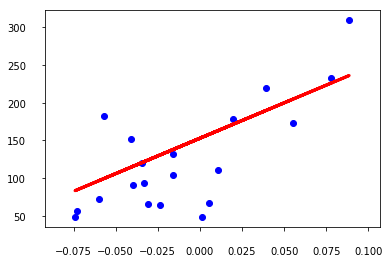

In [11]:
# Plot outputs
plt.scatter(d_X_test, d_Y_test,  color='blue')
plt.plot(d_X_test, d_Y_pred, color='red', linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=10, pad=15)
plt.tick_params(axis='y', which='minor', labelsize=10, pad=15)

plt.show()


## R solution

Let's see how to solve the problem using R.

Please note how it is easier to plot the graph with R.

/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)



Call:
lm(formula = target ~ Body_mass_index, data = df_Train)

Coefficients:
    (Intercept)  Body_mass_index  
          152.9            938.2  



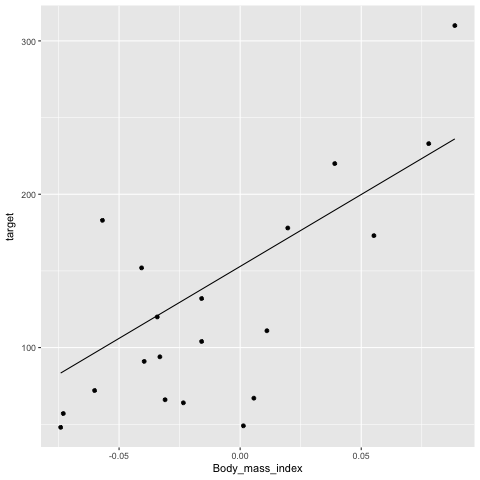

In [12]:
%%R -i df,d_Y
library(dplyr)
library(magrittr)
library(ggplot2)



nrow=dim(df)[1]
ntest=20
df['target']=d_Y
df %<>%
  select(Body_mass_index,target)
df_Train=df[1:(nrow-ntest),]
df_Test=df[(nrow-ntest+1):nrow,]

model=lm(target ~ Body_mass_index,data=df_Train)

print(model)

pred=predict.lm(model,df_Test)
df_Test %>% 
  mutate(pred=pred) %>% 
  ggplot() +
  geom_point(aes(Body_mass_index,target)) +
  geom_line(aes(Body_mass_index,pred))   


## Exponential fit

In the last part of this lesson we'll see how to implement a function ad try to find the best parameters in order to obtain the best fit.

For this scope we'll use the function `optimize.minimize` of `sicpy` ([library page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

Optimization terminated successfully.
[ 0.97336709  0.98685365 -0.07998282]
[7761.00933580766, 13.055053196410771]


<function matplotlib.pyplot.show(*args, **kw)>

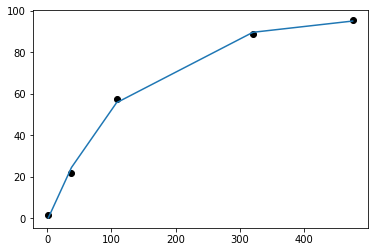

In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

baskets = np.array([475, 108, 2, 38, 320])
scaling_factor = np.array([95.5, 57.7, 1.4, 21.9, 88.8])

def lsq(arg):
    a = arg[0]*100
    b = arg[1]*100
    c = arg[2]*0.1
    now = a - (b*np.exp(c * baskets)) - scaling_factor
    return np.sum(now**2)

def pred(arg):
    a = arg[0]*100
    b = arg[1]*100
    c = arg[2]*0.1
    ret = a - (b*np.exp(c * baskets))
    return ret

guesses = [1, 1, -0.9]
res = scipy.optimize.minimize(lsq, guesses)

print(res.message)

print(res.x)

print([lsq(guesses), lsq(res.x)])
#Reorder of variabiles
baskets=np.sort(baskets)
scaling_factor=np.sort(scaling_factor)
#Prevision
prev=pred(res.x)
#Plot
plt.scatter(baskets,scaling_factor,color='black')
plt.plot(baskets,prev)
plt.show


## Random Forest Classificator

Now we'll use a rando forest on th on the breast cancer dataset ([Man. Page](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)).


In [93]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rfc
data = load_breast_cancer()
df_X=pd.DataFrame(data.data)
df_Y=data.target
print('shape di df_X:',df_X.shape)
print('shape di df_Y:',df_Y.shape)
nrow=df.shape[0]
ntest=50
df_X_train=df_X.head(nrow-ntest)
df_Y_train=df_Y[0:(nrow-ntest)]
df_X_test=df_X.tail(ntest)
df_Y_test=df_Y[(nrow-ntest):nrow]
df_Y_test.shape
model = rfc(n_jobs=-1,oob_score=True,n_estimators=100)
print('Model parameters:',model)
model.fit(df_X_train,df_Y_train)
print('Importance of the features',model.feature_importances_)
print('Acuracy od the model during train is: %i%s'%(int(model.oob_score_*100),'%'))
pred=model.predict(df_X_test)
diff=pred-df_Y_test
diff=sum(abs(diff))
acc=1-diff/len(df_Y_test)
print('Accuracy of the model on the test set: %i%s'%(int(acc*100),'%'))
print('Accuracy of the model on the test set: %i%s'%(int(model.score(df_X_test,df_Y_test)*100),'%'))

shape di df_X: (569, 30)
shape di df_Y: (569,)
Model parameters: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Importance of the features [0.01966114 0.01339383 0.0426575  0.05279187 0.00922746 0.01566407
 0.08567636 0.06809251 0.00346956 0.00169911 0.01189129 0.00316471
 0.01591333 0.02712882 0.00790969 0.00267262 0.00787562 0.00199182
 0.00231559 0.00436833 0.08871483 0.01826003 0.14573365 0.10610189
 0.02252821 0.01247897 0.04681689 0.14292227 0.0126807  0.00619734]
Acuracy od the model during train is: 92%
Accuracy of the model on the test set: 52%
Accuracy of the model on the test set: 52%


In [ ]:
**NOTE**: we can do the same analysis in a easier way.

In [117]:
from sklearn.model_selection import cross_val_score
model = rfc(n_jobs=-1,n_estimators=10)
# dfFake=pd.DataFrame()
# YFake=np.ndarray(shape=(1,0))
# XFake=np.ndarray(shape=(0,30))
# for i in range(0,1000):
#     XFake=np.append(XFake,data.data,axis=0)
#     YFake=np.append(YFake,data.target)
scores = cross_val_score(model, data.data, data.target, cv=10)
# scores = cross_val_score(model,XFake,YFake, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))           



Accuracy: 0.96 (+/- 0.03)


In [88]:
import numpy as np
type(data.target
    )
YFake=np.ndarray(shape=(1,0))
YFake=np.append(YFake,data.target)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.